<a href="https://colab.research.google.com/github/saja30/adult_repository/blob/main/Project_4_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import set_config
set_config(transform_output="pandas")

In [ ]:
# build nural network
#Keras imports
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import metrics

In [ ]:
file_name=("/content/drive/MyDrive/assignment/dult.csv")
df=pd.read_csv(file_name)
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [ ]:
cat_df=df.select_dtypes("object").columns
cat_df

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [ ]:
for col in cat_df:
  print(f"{col}: {df[col].value_counts()}")

workclass: workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education: education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital-status: marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation: occupation
Prof-specialty       61

In [ ]:
# replacing ? with NA
df=df.replace("?",np.nan)

In [ ]:
df["income"]=df["income"].replace({">50K":1,"<=50K":0})

In [ ]:
df["income"].value_counts()

,count
income,
0,37155
1,11687


In [ ]:
df.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [64]:
# split data
y=df["income"]
X=df.drop("income",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
# greate object columns & processing
num_cols=X_train.select_dtypes("number").columns
num_scale=StandardScaler()
num_pipe=make_pipeline(num_scale)
num_tuple=("numeric",num_pipe,num_cols)
num_tuple


('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'))

In [ ]:
cat_cols=X_train.select_dtypes("object").columns
impute_na=SimpleImputer(strategy="constant",fill_value="NA")
cat_ohe=OneHotEncoder(drop="first",sparse=False)
cat_pipe=make_pipeline(impute_na,cat_ohe)
cat_tuple=("categorical",cat_pipe,cat_cols)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder', OneHotEncoder(drop='first', sparse=False))]),
 Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'gender', 'native-country'],
       dtype='object'))

In [ ]:
preprocessor=ColumnTransformer([num_tuple,cat_tuple],verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [62]:
X_train_tf=preprocessor.transform(X_train)
X_test_tf=preprocessor.transform(X_test)

In [ ]:
X_train_tf.head(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_NA,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
27859,0.171771,-1.538807,0.358689,-0.144508,5.711885,-2.288453,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5654,0.026057,1.225138,1.136866,-0.144508,-0.220251,-0.276184,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# build keras model
# define input shape
input_shape=X_train_tf.shape[1]
input_shape

100

In [ ]:
model=Sequential()
model.add(Dense(100, input_dim=input_shape,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='bce', optimizer='adam', metrics=['accuracy',metrics.Precision(),
                                                     metrics.Recall()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,201 (39.85 KB)

 Trainable params: 10,201 (39.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_accuracy",patience=5)

In [ ]:
history=model.fit(X_train_tf,y_train,epochs=50,validation_split=.2,verbose=0,
                  callbacks=[early_stop])

In [ ]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

(<Figure size 600x1200 with 4 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'precision'}>,
        <Axes: title={'center': 'recall'}>], dtype=object))

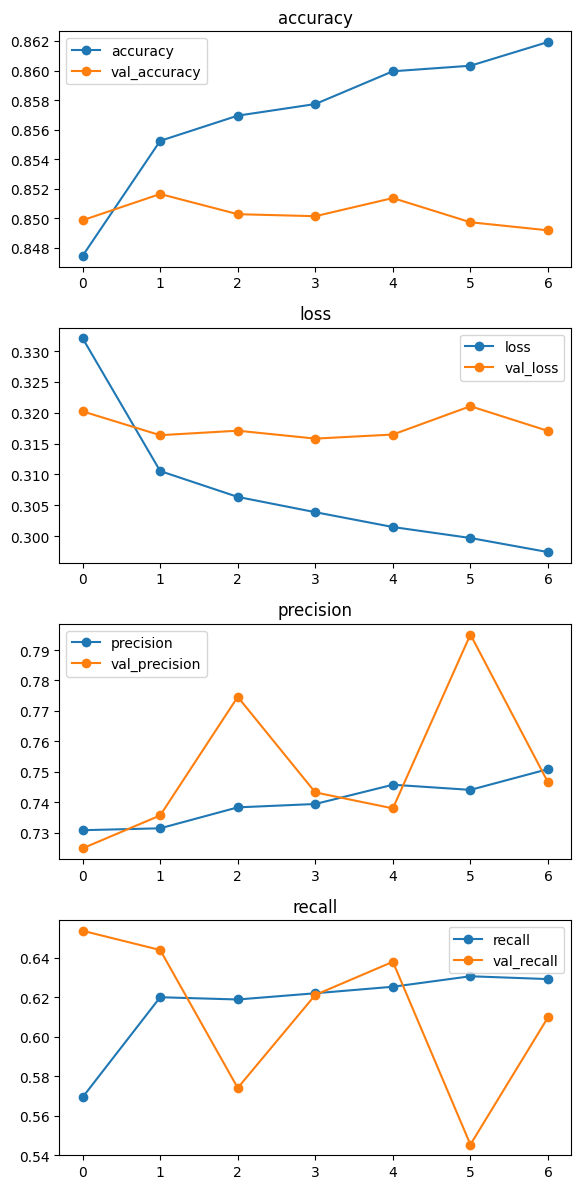

In [ ]:
plot_history(history)

- ***Evaluate the model using sklearn evaluation metrics***

In [ ]:
y_pred_test=model.predict(X_test_tf)
y_pred_test[:5]

382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.01187815],
       [0.00929558],
       [0.9695443 ],
       [0.14255002],
       [0.73102045]], dtype=float32)

In [ ]:
# round the prediction
y_pred_test=np.round(y_pred_test)
y_pred_test[:5]


array([[0.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
y_pred_train=model.predict(X_train_tf)
y_pred_train[:5]

1145/1145 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


array([[0.5090924 ],
       [0.5578019 ],
       [0.72193563],
       [0.6244554 ],
       [0.06640387]], dtype=float32)

In [ ]:
y_pred_train=np.round(y_pred_train)
y_pred_train[:5]


array([[1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     27801
           1       0.76      0.62      0.69      8830

    accuracy                           0.86     36631
   macro avg       0.82      0.78      0.80     36631
weighted avg       0.86      0.86      0.86     36631



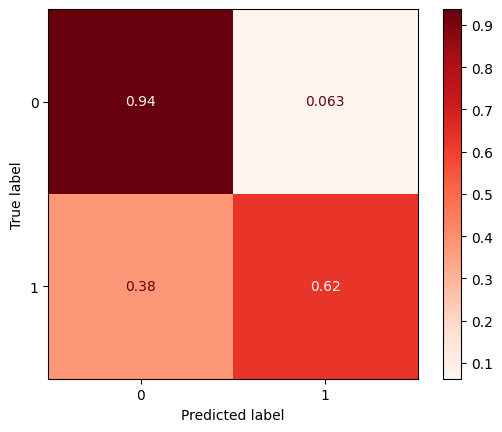

In [55]:
print(classification_report(y_train,y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train,cmap="Reds",normalize="true");

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9354
           1       0.74      0.64      0.68      2857

    accuracy                           0.86     12211
   macro avg       0.82      0.78      0.80     12211
weighted avg       0.86      0.86      0.86     12211



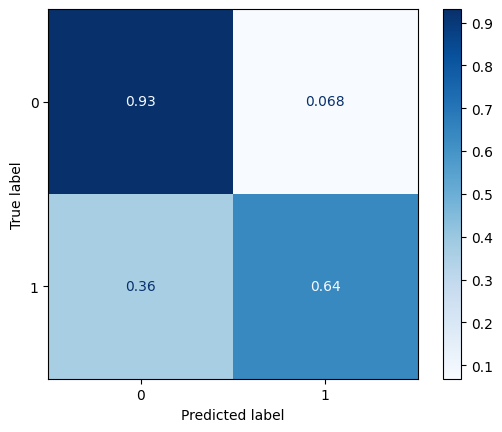

In [56]:
print(classification_report(y_test,y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test,cmap="Blues",normalize="true");

# Tune at least 3 parameters with the Keras tuner


In [ ]:
!pip install keras-tuner
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import os
folder="kerasTuner/"
os=os.makedirs(folder,exist_ok=True)


In [ ]:
def build_model(hp):
 model=Sequential()
 model.add(Dense(units=hp.Int("units", min_value=10, max_value=100, step=10),
                    input_dim=input_shape, activation='relu'))
 model.add(Dropout(hp.Float(name="dropout_value",min_value=0,max_value=.5,step=.1)))
 model.add(Dense(1, activation='sigmoid'))

# compile model
 lr = hp.Float(name="learning_rate", min_value=0, max_value=.5, step=.1)
 model.compile(loss='bce', optimizer=hp.Choice("optimizer",["adam","nadam","rmsprop"]),
               metrics=['accuracy',metrics.Precision(),
                                                     metrics.Recall()])
 return model

In [ ]:
tuner=kt.Hyperband(build_model,
                   objective="val_accuracy",
                   max_epochs=100,
                   directory=folder,
                   overwrite=True,
                   project_name="income_tuner"
                   )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
rearly_stopping=EarlyStopping(monitor="val_accuracy",patience=5)

In [ ]:
# run the tuner
epochs=100
tuner.search(X_train_tf,y_train,epochs=epochs,validation_split=.2,callbacks=[rearly_stopping])

Trial 254 Complete [00h 00m 57s]
val_accuracy: 0.8523269891738892

Best val_accuracy So Far: 0.855875551700592
Total elapsed time: 01h 18m 55s


In [48]:
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 100,
 'dropout_value': 0.4,
 'learning_rate': 0.0,
 'optimizer': 'nadam',
 'tuner/epochs': 34,
 'tuner/initial_epoch': 12,
 'tuner/bracket': 3,
 'tuner/round': 2,
 'tuner/trial_id': '0202'}

In [49]:
best_model=tuner.get_best_models()[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'nada

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,201 (39.85 KB)

 Trainable params: 10,201 (39.85 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Evaluate your best model on unseen test data
results=best_model.evaluate(X_test_tf,y_test,return_dict=True)
results

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8622 - loss: 0.3033 - precision: 0.7407 - recall: 0.6478


{'accuracy': 0.8627467155456543,
 'loss': 0.2996428906917572,
 'precision': 0.7401382923126221,
 'recall': 0.6370318531990051}

In [51]:
# make prediction
y_pred_test=best_model.predict(X_test_tf)
y_pred_test[:5]

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.00884018],
       [0.00969238],
       [0.9906903 ],
       [0.21641737],
       [0.7006921 ]], dtype=float32)

In [52]:
y_pred_test=np.round(y_pred_test)
y_pred_test[:5]


array([[0.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9354
           1       0.74      0.64      0.68      2857

    accuracy                           0.86     12211
   macro avg       0.82      0.78      0.80     12211
weighted avg       0.86      0.86      0.86     12211



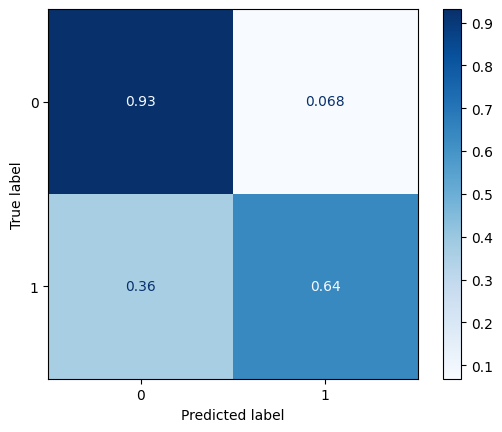

In [53]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test,cmap="Blues",normalize="true");

In [59]:
y_pred_train_hp=best_model.predict(X_train_tf)

1145/1145 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [69]:
y_pred_train_hp=np.round(y_pred_train_hp)
y_pred_train_hp[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     27801
           1       0.76      0.65      0.70      8830

    accuracy                           0.87     36631
   macro avg       0.83      0.79      0.81     36631
weighted avg       0.86      0.87      0.86     36631



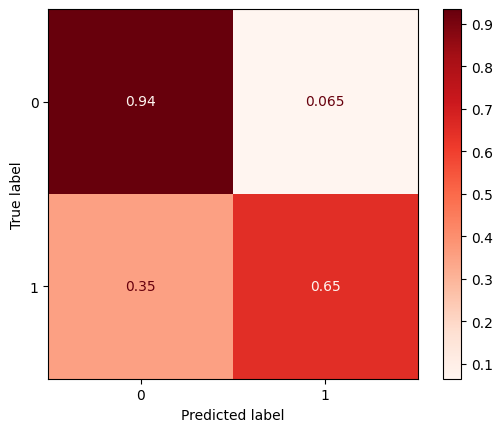

In [70]:
print(classification_report(y_train,y_pred_train_hp))
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_hp,cmap="Reds",normalize="true");